추론 실습을 위해 깃헙 저장소를 다운로드합니다.

In [1]:
print("Download Example Repository")
!git clone https://github.com/jetsonai/DeepLearning4Projects

Download Example Repository
Cloning into 'DeepLearning4Projects'...
remote: Enumerating objects: 1268, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 1268 (delta 220), reused 130 (delta 130), pack-reused 989 (from 1)
Receiving objects: 100% (1268/1268), 163.71 MiB | 28.52 MiB/s, done.
Resolving deltas: 100% (727/727), done.
Updating files: 100% (120/120), done.


In [2]:
# Colab에서 OpenCV 이미지를 보기 위한 패키지를 불러옵니다.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
%cd /content/DeepLearning4Projects/Chap5
# 추론을 위한 클래스를 불러옵니다.
from Inference_Cam import Inference_Class

# 클래스를 초기화하고 모델을 불러옵니다.
inferenceClass = Inference_Class()
is_train_from_scratch = False
inferenceClass.load_model(is_train_from_scratch)

/content/DeepLearning4Projects/Chap5


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 101MB/s] 
/content/DeepLearning4Projects/Chap5/Inference_Cam.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the defau

In [4]:
def inference(input_image):
    cv_image = []
    if isinstance(input_image, str):
        cv_image = cv2.imread(input_image, cv2.IMREAD_COLOR)
    else:
        cv_image = np.copy(input_image)
    result_frame, label_text, class_prob = inferenceClass.inference_image(cv_image)
    print("입력 이미지는 {} % 확률로 {}으로 분류됩니다.".format((float)(class_prob) * 100, label_text))
    cv2_imshow(result_frame)
    return result_frame

이미지를 업로드 후 해당 이미지의 경로를 입력합니다.

/content
입력 이미지는 96.4657 % 확률로 can으로 분류됩니다.


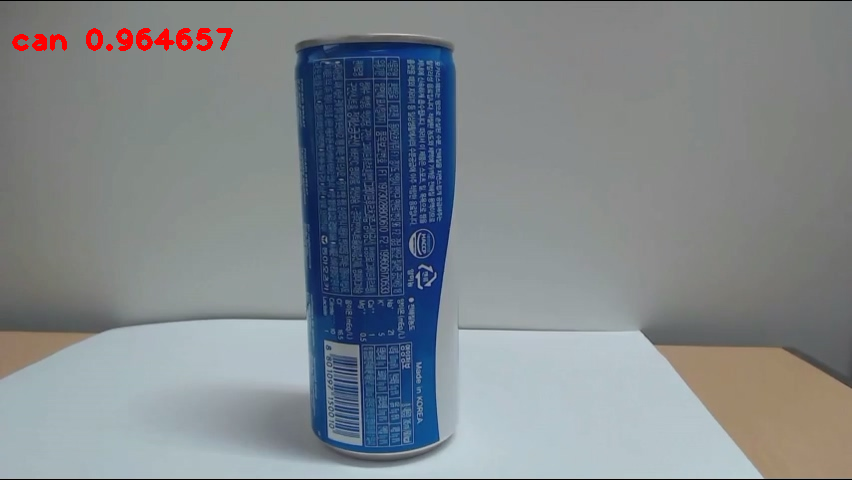

In [5]:
%cd /content
input_image_path = "/content/DeepLearning4Projects/Chap5/test_image_1.jpg"
#input_image_path = "/content/DeepLearning4Projects/Chap5/test_image_2.jpg"
result = inference(input_image_path)